
# **Problem Statement**

The main objective of our project is to create Book Recommender System aims to simplify the book discovery process, assist users in finding books that align with their interests, and ultimately enhance the overall reading experience for individuals of diverse tastes and preferences. .



In [127]:
#importing the required libraries
#Data wrangling
import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth",1000)#setting maximum column width
#data visualization
import seaborn as sns
sns.set_style('white')
import matplotlib.pyplot as plt
#To create wordcloud
plt.rcParams["figure.figsize"] = (8,8)

import random

# This is to supress the warning messages (if any) generated in our code
import warnings
warnings.filterwarnings('ignore')

### Import /Load dataset

In [128]:
# Load Dataset
users_df=pd.read_csv("Users.csv",encoding="latin-1")
books_df=pd.read_csv("Books.csv",encoding="latin-1")
rating_df=pd.read_csv("Ratings.csv",encoding="latin-1")

## **Taking a look at datasets**

In [129]:
users_df.head(3)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN


In [130]:
books_df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg


In [131]:
rating_df.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


In [132]:
# shapes of all the datasets
print('Shape of Users: {}, Books: {} and Ratings: {}'.format(users_df.shape, books_df.shape, rating_df.shape))

Shape of Users: (278858, 3), Books: (271360, 8) and Ratings: (1149780, 3)


# **Books data**



---


###**Data Description**

Books are identified by their respective ISBN. Invalid ISBNs have already been removed
from the dataset. Moreover, some content-based information is given (Book-Title,
Book-Author, Year-Of-Publication, Publisher), obtained from Amazon Web
Services. Note that in the case of several authors, only the first is provided. URLs linking
to cover images are also given, appearing in three different flavors (Image-URL-S,
Image-URL-M, Image-URL-L), i.e., small, medium, large. These URLs point to the
Amazon website.


In [133]:
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [134]:
print('This shape of Books datasheet is : ',books_df.shape)
print('='*30)
print('This shape of Ratings datasheet is : ',rating_df.shape)
print('='*30)
print('This shape of Users datasheet is : ',users_df.shape)

This shape of Books datasheet is :  (271360, 8)
This shape of Ratings datasheet is :  (1149780, 3)
This shape of Users datasheet is :  (278858, 3)


In [135]:
print(books_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB
None


In [136]:
books_df.describe()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242135,102022,202,16807,271044,271044,271041
top,0195153448,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/185326119X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/185326119X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/225307649X.01.LZZZZZZZ.jpg
freq,1,27,632,13903,7535,2,2,2


In [137]:
# Missing value
print(books_df.isnull().sum())

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


In [138]:
# Checking  for  null value in book author
books_df[books_df['Book-Author'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
118033,0751352497,A+ Quiz Masters:01 Earth,NaN,1999,Dorling Kindersley,http://images.amazon.com/images/P/0751352497.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0751352497.01.LZZZZZZZ.jpg
187689,9627982032,The Credit Suisse Guide to Managing Your Personal Wealth,NaN,1995,Edinburgh Financial Publishing,http://images.amazon.com/images/P/9627982032.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9627982032.01.LZZZZZZZ.jpg


In [139]:
#Filling the null value
books_df.loc[187689, 'Book-Author'] = 'Larissa Anne Downes'
books_df.loc[118033, 'Book-Author'] = 'Other'

In [140]:
# Checking null values in publisher
books_df[books_df['Publisher'].isna()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,http://images.amazon.com/images/P/193169656X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/193169656X.01.LZZZZZZZ.jpg
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1931696993.01.LZZZZZZZ.jpg


In [141]:
#Replacing NaNs with correct  values
books_df.loc[128890, 'Publisher'] = 'Mundania Press LLC'
books_df.loc[129037, 'Publisher'] = 'Bantam'

In [142]:
#insepcting the values in year of publication
books_df['Year-Of-Publication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

Name of few publication companies have been incorrectly put in this column.There are values such as 0 ,2024,2030 etc. which is also not possible .Let's rectify these mistakes

In [143]:
# correcting this error
books_df[books_df['Year-Of-Publication'] == 'DK Publishing Inc']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\"";Michael Teitelbaum""",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\"";James Buckley""",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [144]:
# on searching for these  books we came to know about its authors
#ISBN '078946697X'
books_df.loc[books_df.ISBN == '078946697X','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '078946697X','Book-Author'] = "Michael Teitelbaum"
books_df.loc[books_df.ISBN == '078946697X','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '078946697X','Book-Title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"

#ISBN '0789466953'
books_df.loc[books_df.ISBN == '0789466953','Year-Of-Publication'] = 2000
books_df.loc[books_df.ISBN == '0789466953','Book-Author'] = "James Buckley"
books_df.loc[books_df.ISBN == '0789466953','Publisher'] = "DK Publishing Inc"
books_df.loc[books_df.ISBN == '0789466953','Book-Title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"

In [145]:
#checking the rows having 'Gallimard' as yearOfPublication
books_df.loc[books_df['Year-Of-Publication'] == 'Gallimard',:]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-Marie Gustave Le ClÃ?Â©zio""",2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN


In [146]:
books_df.loc[books_df.ISBN=='2070426769','Year-Of-Publication']=2003
books_df.loc[books_df.ISBN=='2070426769','Book-Author']='Jean-Marie Gustave Le ClÃ?Â©zio'
books_df.loc[books_df.ISBN=='2070426769','Publisher']='Gallimard'
books_df.loc[books_df.ISBN=='2070426769','Book-Title']="Peuple du ciel, suivi de 'Les Bergers"

In [147]:
#Checking if the corrections are in place
books_df.loc[books_df['ISBN'].isin(['2070426769','0789466953','078946697X'])]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
209538,078946697X,"DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/078946697X.01.LZZZZZZZ.jpg,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le ClÃ?Â©zio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2070426769.01.LZZZZZZZ.jpg,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0789466953.01.LZZZZZZZ.jpg,NaN


In [148]:
# changing dtype of year of publication
books_df['Year-Of-Publication'] =books_df['Year-Of-Publication'].astype(int)

In [149]:
# something is off about years of publication like:
books_df[(books_df['Year-Of-Publication'] > 0) & (books_df['Year-Of-Publication'] < 1800)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
227531,9643112136,Dalan-i bihisht (Dastan-i Irani),Nazi Safavi,1378,Intisharat-i Quqnus,http://images.amazon.com/images/P/9643112136.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/9643112136.01.LZZZZZZZ.jpg
253750,964442011X,Tasht-i khun,IsmaÂ°il Fasih,1376,Nashr-i Alburz,http://images.amazon.com/images/P/964442011X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/964442011X.01.LZZZZZZZ.jpg


In [150]:
#replacing with correct  values
books_df.loc[books_df.ISBN=='9643112136','Year-Of-Publication'] = 2010
books_df.loc[books_df.ISBN=='964442011X', 'Year-Of-Publication'] = 1991

In [151]:
books_df[(books_df['Year-Of-Publication'] > 2024)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
37487,0671746103,MY TEACHER FRIED MY BRAINS (RACK SIZE) (MY TEACHER BOOKS),Coville,2030,Aladdin,http://images.amazon.com/images/P/0671746103.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671746103.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671746103.01.LZZZZZZZ.jpg
55676,0671791990,MY TEACHER FLUNKED THE PLANET (RACK SIZE) (MY TEACHER BOOKS),Bruce Coville,2030,Aladdin,http://images.amazon.com/images/P/0671791990.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671791990.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671791990.01.LZZZZZZZ.jpg
78168,0870449842,Crossing America,National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870449842.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0870449842.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0870449842.01.LZZZZZZZ.jpg
80264,0140301690,Alice's Adventures in Wonderland and Through the Looking Glass (Puffin Books),Lewis Carroll,2050,Puffin Books,http://images.amazon.com/images/P/0140301690.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0140301690.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0140301690.01.LZZZZZZZ.jpg
97826,0140201092,Outline of European Architecture (Pelican S.),Nikolaus Pevsner,2050,Penguin USA,http://images.amazon.com/images/P/0140201092.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0140201092.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0140201092.01.LZZZZZZZ.jpg
116053,0394701658,Three Plays of Eugene Oneill,Eugene O'Neill,2038,Vintage Books USA,http://images.amazon.com/images/P/0394701658.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0394701658.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0394701658.01.LZZZZZZZ.jpg
118294,3442436893,Das groÃ?Â?e BÃ?Â¶se- MÃ?Â¤dchen- Lesebuch.,Kathy Lette,2026,Goldmann,http://images.amazon.com/images/P/3442436893.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3442436893.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3442436893.01.LZZZZZZZ.jpg
192993,0870446924,"Field Guide to the Birds of North America, 3rd Ed.",National Geographic Society,2030,National Geographic,http://images.amazon.com/images/P/0870446924.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0870446924.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0870446924.01.LZZZZZZZ.jpg
228173,0671266500,FOREST PEOPLE (Touchstone Books (Hardcover)),Colin M. Turnbull,2030,Simon &amp; Schuster,http://images.amazon.com/images/P/0671266500.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671266500.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671266500.01.LZZZZZZZ.jpg
240169,0684718022,In Our Time: Stories (Scribner Classic),Ernest Hemingway,2030,Collier Books,http://images.amazon.com/images/P/0684718022.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0684718022.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0684718022.01.LZZZZZZZ.jpg


In [152]:
#replacing with correct  values
books_df.loc[books_df.ISBN=='0671746103','Year-Of-Publication'] = 1991
books_df.loc[books_df.ISBN=='0671791990', 'Year-Of-Publication'] = 2005
books_df.loc[books_df.ISBN=='0870449842','Year-Of-Publication'] = 2001
books_df.loc[books_df.ISBN=='0140301690', 'Year-Of-Publication'] = 2003
books_df.loc[books_df.ISBN=='0140201092','Year-Of-Publication'] = 1981
books_df.loc[books_df.ISBN=='0394701658', 'Year-Of-Publication'] = 1995
books_df.loc[books_df.ISBN=='0870446924','Year-Of-Publication'] = 2003
books_df.loc[books_df.ISBN=='0671266500', 'Year-Of-Publication'] = 1987
books_df.loc[books_df.ISBN=='0684718022','Year-Of-Publication'] = 1996
books_df.loc[books_df.ISBN=='068471809X', 'Year-Of-Publication'] = 1937
books_df.loc[books_df.ISBN=='0671740989','Year-Of-Publication'] = 1991
books_df.loc[books_df.ISBN=='3442436893','Year-Of-Publication'] = 2023
#replacing with correct  values
books_df.loc[books_df.ISBN=='0671746103', 'Book-Author'] = 'Bruce Coville'

In [153]:
books_df[(books_df['Year-Of-Publication'] == 0)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3150000335.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3150000335.01.LZZZZZZZ.jpg
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/342311360X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/342311360X.01.LZZZZZZZ.jpg
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0571197639.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0571197639.01.LZZZZZZZ.jpg
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/3596214629.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/3596214629.01.LZZZZZZZ.jpg
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda Del Fiume Piedra,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/8845229041.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/8845229041.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/014029953X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/014029953X.01.LZZZZZZZ.jpg
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0340571187.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0340571187.01.LZZZZZZZ.jpg
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/8427201079.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/8427201079.01.LZZZZZZZ.jpg
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0887781721.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0887781721.01.LZZZZZZZ.jpg


In [154]:
books_df.loc[(books_df['Year-Of-Publication'] == 0),'Year-Of-Publication'] = np.NAN

In [155]:
#arrangeing the year of publication count in ascending order

display(books_df['Year-Of-Publication'].value_counts().sort_index(ascending=True))

Year-Of-Publication
1806.0    1
1897.0    1
1900.0    3
1901.0    7
1902.0    2
         ..
2012.0    1
2020.0    3
2021.0    1
2023.0    1
2024.0    1
Name: count, Length: 109, dtype: int64

In [156]:
# replacing NaN values with median value of Year-Of-Publication
books_df['Year-Of-Publication'].fillna(int(books_df['Year-Of-Publication'].median()), inplace=True)

In [157]:
books_df['Year-Of-Publication'].value_counts()

Year-Of-Publication
1996.0    18649
2002.0    17627
1999.0    17431
2001.0    17360
2000.0    17234
          ...  
2023.0        1
1910.0        1
1934.0        1
1904.0        1
2024.0        1
Name: count, Length: 109, dtype: int64

In [158]:
books_df['Book-Author'].value_counts()

Book-Author
Agatha Christie         632
William Shakespeare     567
Stephen King            524
Ann M. Martin           423
Carolyn Keene           373
                       ... 
R. Gelman                 1
Ellery R. Sheets          1
Artiste C. Arthur         1
Emily Pearl Kingsley      1
Christopher  Biffle       1
Name: count, Length: 102021, dtype: int64

In [159]:
books_df['Publisher'].value_counts()

Publisher
Harlequin                        7535
Silhouette                       4220
Pocket                           3905
Ballantine Books                 3783
Bantam Books                     3646
                                 ... 
Windstream Publishing Company       1
Polaris Books                       1
Hannover House                      1
Amber Quill Press, LLC.             1
Connaught                           1
Name: count, Length: 16804, dtype: int64

In [160]:
#Inspecting the missing values in 'Publisher' column
books_df.loc[books_df.Publisher.isnull(),:]


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L


In [161]:
#Uppercasing the ISBN numbers and Book-Author name
books_df['ISBN']=books_df['ISBN'].str.upper()
books_df['Book-Author']=books_df['Book-Author'].str.upper()

In [162]:
# Checking the uppercase
books_df[books_df['Book-Title']=='Emma']

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1495,0451523067,Emma,JANE AUSTEN,1994.0,New Amer Library Classics,http://images.amazon.com/images/P/0451523067.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0451523067.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0451523067.01.LZZZZZZZ.jpg
8763,055321019X,Emma,JANE AUSTEN,1981.0,Bantam Books,http://images.amazon.com/images/P/055321019X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/055321019X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/055321019X.01.LZZZZZZZ.jpg
11571,0553212737,Emma,JANE AUSTEN,1984.0,Bantam,http://images.amazon.com/images/P/0553212737.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553212737.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553212737.01.LZZZZZZZ.jpg
14263,0140258175,Emma,JANE AUSTEN,1996.0,Penguin Putnam~trade,http://images.amazon.com/images/P/0140258175.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0140258175.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0140258175.01.LZZZZZZZ.jpg
45955,B000051WXP,Emma,JANE AUSTEN,1996.0,Random House,http://images.amazon.com/images/P/B000051WXP.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/B000051WXP.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/B000051WXP.01.LZZZZZZZ.jpg
53513,0760701652,Emma,JANE AUSTEN,1996.0,Barnes Noble Books,http://images.amazon.com/images/P/0760701652.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0760701652.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0760701652.01.LZZZZZZZ.jpg
90473,2253140732,Emma,JANE AUSTEN,1997.0,LGF,http://images.amazon.com/images/P/2253140732.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/2253140732.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/2253140732.01.LZZZZZZZ.jpg
106616,0460010247,Emma,JANE AUSTEN,1976.0,J m Dent &amp; Sons Ltd,http://images.amazon.com/images/P/0460010247.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0460010247.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0460010247.01.LZZZZZZZ.jpg
133269,0553211595,Emma,JANE AUSTEN,1984.0,Bantam,http://images.amazon.com/images/P/0553211595.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0553211595.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0553211595.01.LZZZZZZZ.jpg
166404,0681218894,Emma,JANE AUSTEN,1996.0,Hunter Publishing+inc,http://images.amazon.com/images/P/0681218894.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0681218894.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0681218894.01.LZZZZZZZ.jpg


ISBN numbers for books with the same title and author would change if the year of release (revised editions),regional versions or publishing companies are different. So, let's look for rows where entire column values are identical.

In [163]:
#Checking for duplicates in books_df
books_df[books_df.duplicated()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
6635,002542730X,Politically Correct Bedtime Stories: Modern Tales for Our Life and Times,JAMES FINN GARNER,1994.0,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/002542730X.01.LZZZZZZZ.jpg
11925,014062080X,The Scarlet Letter (Penguin Popular Classics),NATHANIEL HAWTHORNE,1994.0,Penguin Books Ltd,http://images.amazon.com/images/P/014062080X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/014062080X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/014062080X.01.LZZZZZZZ.jpg
16298,097089726X,Jasper,MICHELLE GROCE,2003.0,Novello Festival Press,http://images.amazon.com/images/P/097089726X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/097089726X.01.LZZZZZZZ.jpg
19266,039592720X,Interpreter of Maladies,JHUMPA LAHIRI,1999.0,Houghton Mifflin Co,http://images.amazon.com/images/P/039592720X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/039592720X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/039592720X.01.LZZZZZZZ.jpg
22339,042512164X,Capital Crimes,LAWRENCE SANDERS,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/042512164X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/042512164X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/042512164X.01.LZZZZZZZ.jpg
...,...,...,...,...,...,...,...,...
267020,088404632X,Dianetics: The Modern Science of Mental Health,L. RON HUBBARD,1995.0,Bridge Publications (CA),http://images.amazon.com/images/P/088404632X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/088404632X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/088404632X.01.LZZZZZZZ.jpg
269297,055215038X,The Sleeper,GILLIAN WHITE,2003.0,Corgi Books,http://images.amazon.com/images/P/055215038X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/055215038X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/055215038X.01.LZZZZZZZ.jpg
269552,037376099X,"Patient Nurse (Man Of The Month) (Harlequin Desire, No 1099)",DIANA PALMER,1997.0,Silhouette,http://images.amazon.com/images/P/037376099X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/037376099X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/037376099X.01.LZZZZZZZ.jpg
270285,189481505X,I-O,SIMON LOGAN,2002.0,Prime (OH),http://images.amazon.com/images/P/189481505X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/189481505X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/189481505X.01.LZZZZZZZ.jpg


In [164]:
#Dropping the rows with the entire column values are duplicated
books_df.drop_duplicates(keep="first",inplace=True)
books_df.reset_index(drop=True,inplace=True)

In [165]:
#Dropping the image urls
#books_df.drop(columns=['Image-URL-S','Image-URL-M','Image-URL-L'],inplace=True)

In [166]:
books_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271047 entries, 0 to 271046
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ISBN                 271047 non-null  object 
 1   Book-Title           271047 non-null  object 
 2   Book-Author          271047 non-null  object 
 3   Year-Of-Publication  271047 non-null  float64
 4   Publisher            271047 non-null  object 
 5   Image-URL-S          271047 non-null  object 
 6   Image-URL-M          271047 non-null  object 
 7   Image-URL-L          271044 non-null  object 
dtypes: float64(1), object(7)
memory usage: 16.5+ MB


In [167]:
books_df.to_csv (r'books_dataframe.csv', index = None, header=True) 

# **Users Data**


---




###**Data description**

Contains the users. Note that user IDs (User-ID) have been anonymized and map to
integers. Demographic data is provided (Location, Age) if available. Otherwise, these fields contain NULL values.

In [168]:
users_df.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [169]:
#inspecting the columns in users_df
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       168096 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


* There are records of 278858 users in this dataframe.There are 3 columns in this dataframe.
* The 'Age' column has null values

In [170]:
#Checking for duplicates in users_df
users_df[users_df['User-ID'].duplicated()].sum()

User-ID       0
Location      0
Age         0.0
dtype: object

In [171]:
#Checking the missing values
print(users_df.isnull().sum())

User-ID          0
Location         0
Age         110762
dtype: int64


* The 39.7% of values in the 'Age' column are missing/NaN values

In [172]:
#summarizing data in 'Age' column
users_df['Age'].describe()

count    168096.000000
mean         34.751434
std          14.428097
min           0.000000
25%          24.000000
50%          32.000000
75%          44.000000
max         244.000000
Name: Age, dtype: float64

In [173]:
#number of unique values in 'Location'
users_df['Location'].nunique()

57339

In [174]:
#extracting the country names from users_df
for i in users_df:
    users_df['Country']=users_df.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')

In [175]:
#Displaying the country names
set(users_df['Country'])

{'',
 '01776',
 '02458',
 '19104',
 '23232',
 '30064',
 '85021',
 '87510',
 '_ brasil',
 'a',
 'aaa',
 'adsgfdr',
 'afghanistan',
 'ahrensburg',
 'alachua',
 'albania',
 'alderney',
 'algeria',
 'algérie',
 'allen',
 'ama lurra',
 'america',
 'american samoa',
 'andorra',
 'angola',
 'antarctica',
 'aotearoa',
 'argentina',
 'armenia',
 'aroostook',
 'aruba',
 'asturies',
 'auckland',
 'austbritania',
 'australia',
 'australii',
 'austria',
 'autralia',
 'az',
 'azerbaijan',
 'bademn würtemberg',
 'bahamas',
 'bahrain',
 'baltimore',
 'bangladesh',
 'barbados',
 'basilicata',
 'basque country',
 'bavaria',
 'baxter',
 'bbbzzzzz',
 'belarus',
 'belgi',
 'belgique',
 'belgium',
 'belize',
 'bell',
 'benin',
 'berguedà',
 'bermuda',
 'bernalillo',
 'bfe',
 'bhutan',
 'bih',
 'bkk',
 'bladen',
 'bolivia',
 'bosnia',
 'botswana',
 'brasil',
 'brazil',
 'brunei',
 'brunei darussalam',
 'bucks',
 'bulgaria',
 'buncombe',
 'burkina faso',
 'burkinafasu',
 'burlington',
 'burma',
 'butler',
 'c

In [176]:
#correcting the mispelled country names
users_df.loc[users_df['Country'].isin(['australii','autralia','western australia']), 'Country'] = 'australia'
users_df.loc[users_df['Country'].isin(['unite states','01776','02458','19104','23232','30064','85021','87510','united sates','united staes','united state','united statea','united stated','america'
                                      'united stated of america','united states','united states of america','us','us of a','us virgin islands',
                                      'usa  canada','usa currently living in england','uusa','usaa','wonderful usa','california','orange co']), 'Country'] = 'usa'
users_df.loc[users_df['Country'].isin(['united kindgdom', 'united kindgonm','united kingdom','u k']), 'Country'] = 'uk'
users_df.loc[users_df['Country'].isin(['the philippines', 'philippines', 'philippinies', 'phillipines', 'phils', 'phippines']), 'Country'] = 'philippines'
users_df.loc[users_df['Country'].isin(['','xxxxxx','universe','nowhere','x','y','a','öð¹ú','the','unknown',np.nan,'n/a','aaa','z','somewherein space']), 'Country'] = 'others'
users_df.loc[users_df['Country'].isin([ 'italia','italien','itlay']), 'Country'] = 'italy'
users_df.loc[users_df['Country'].isin([ ' china öð¹ú','chinaöð¹ú','chian']), 'Country'] = 'china'
users_df['Country'].replace([ 'the gambia','the netherlands','geermany','srilanka','saudia arabia','brasil','_ brasil','indiai','malaysian','hongkong','russian federation'],
                            ['gambia','netherlands','germany','sri lanka','saudi arabia','brazil','brazil','india','malaysia','hong kong','russia'],inplace=True)



In [177]:
#Converting the country names to uppercase
users_df['Country']=users_df['Country'].str.upper()

In [178]:
#Dropping the column 'Location'
users_df.drop('Location',axis=1,inplace=True)

In [179]:
users_df.columns

Index(['User-ID', 'Age', 'Country'], dtype='object')

In [180]:
users_df.Country.value_counts()

Country
USA           139746
CANADA         21658
UK             18565
GERMANY        17074
SPAIN          13258
               ...  
ALACHUA            1
CHINA ÖÐ¹Ú         1
MAROC              1
MÉRIDA             1
HERNANDO           1
Name: count, Length: 473, dtype: int64

## **Ratings data**


---



### **Data description**

Contains the book rating information. Ratings (Book-Rating) are either explicit,
expressed on a scale from 1-10 (higher values denoting higher appreciation), or implicit,
expressed by 0.

In [181]:
#displaying the first 5 rows
rating_df.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [182]:
rating_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1149780 non-null  int64 
 1   ISBN         1149780 non-null  object
 2   Book-Rating  1149780 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [183]:
# checking null values
rating_df.isna().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [184]:
# checking for unique user ids and isbn values
print('Number of unique user ids is {} and ISBN no. is {}'.format(rating_df['User-ID'].nunique(), rating_df['ISBN'].nunique()))

Number of unique user ids is 105283 and ISBN no. is 340556




> *This means that many users are buying multiple books. Also some books are really famous and hence are bought by multiple users.*



In [185]:
# making all the ISBN no. uppercase
rating_df['ISBN'].apply(lambda x: x.upper())

0           034545104X
1           0155061224
2           0446520802
3           052165615X
4           0521795028
              ...     
1149775     1563526298
1149776     0679447156
1149777     0515107662
1149778     0590442449
1149779    05162443314
Name: ISBN, Length: 1149780, dtype: object

In [186]:
# checking for duplicates
rating_df[rating_df.duplicated()].sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: object

In [187]:
# lets see if all the books in rating_df are also in books_df
rating_df_new = rating_df[rating_df['ISBN'].isin(books_df['ISBN'])]

In [188]:
# book ratings
rating_df_new['Book-Rating'].value_counts().reset_index()

,Book-Rating,count
0,0,646974
1,8,91739
2,10,71194
3,7,66356
4,9,60754
5,5,45343
6,6,31673
7,4,7613
8,3,5117
9,2,2374




> *We can see for explicit ratings that rating 8 is received by most number of books followed by rating 10.*
> *There are 646974 implicitely rated books.*



In [189]:
# most popular books
rating_df_new.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
215608,0971880107,2502
38505,0316666343,1295
70686,0385504209,883
7325,0060928336,732
32311,0312195516,723
87235,044023722X,647
21293,0142001740,615
144784,067976402X,614
132908,0671027360,586
93670,0446672211,585




> *but this contains both explicit and implicit rating, so we need to seperate them to get better idea.*



In [190]:
explicit_rating = rating_df_new[rating_df_new['Book-Rating'] != 0]
implicit_rating = rating_df_new[rating_df_new['Book-Rating'] == 0]
print('Shape of explicit rating: {} and implicit rating: {}'.format(explicit_rating.shape, implicit_rating.shape))

Shape of explicit rating: (383643, 3) and implicit rating: (646974, 3)


In [191]:
# most purchased books including the implicitely rated books
rating_df_new.groupby('ISBN')['User-ID'].count().reset_index().sort_values(by='User-ID', ascending=False)[:10]['ISBN'].values

array(['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211'], dtype=object)

In [192]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0971880107', '0316666343', '0385504209', '0060928336',
       '0312195516', '044023722X', '0142001740', '067976402X',
       '0671027360', '0446672211']
books_df[books_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,RICH SHAPERO,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
118,0671027360,Angels &amp; Demons,DAN BROWN,2001.0,Pocket Star,http://images.amazon.com/images/P/0671027360.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671027360.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671027360.01.LZZZZZZZ.jpg
305,044023722X,A Painted House,JOHN GRISHAM,2001.0,Dell Publishing Company,http://images.amazon.com/images/P/044023722X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/044023722X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/044023722X.01.LZZZZZZZ.jpg
356,0142001740,The Secret Life of Bees,SUE MONK KIDD,2003.0,Penguin Books,http://images.amazon.com/images/P/0142001740.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0142001740.01.LZZZZZZZ.jpg
408,0316666343,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
522,0312195516,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
706,0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),BILLIE LETTS,1998.0,Warner Books,http://images.amazon.com/images/P/0446672211.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0446672211.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0446672211.01.LZZZZZZZ.jpg
748,0385504209,The Da Vinci Code,DAN BROWN,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg
1922,067976402X,Snow Falling on Cedars,DAVID GUTERSON,1995.0,Vintage Books USA,http://images.amazon.com/images/P/067976402X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/067976402X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/067976402X.01.LZZZZZZZ.jpg


In [193]:
# most popular explicitely rated books
explicit_rating.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]

,ISBN,Book-Rating
21915,0316666343,707
117593,0971880107,581
38771,0385504209,487
18032,0312195516,383
4122,0060928336,320
68795,059035342X,313
12303,0142001740,307
51715,0446672211,295
47910,044023722X,281
57539,0452282152,278


In [194]:
# getting the book names corresponding to these ISBNs
isbn_nums = ['0316666343', '0971880107', '0385504209', '0312195516', '0060928336']
books_df[books_df['ISBN'].isin(isbn_nums)]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
26,0971880107,Wild Animus,RICH SHAPERO,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
408,0316666343,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
522,0312195516,The Red Tent (Bestselling Backlist),ANITA DIAMANT,1998.0,Picador USA,http://images.amazon.com/images/P/0312195516.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0312195516.01.LZZZZZZZ.jpg
748,0385504209,The Da Vinci Code,DAN BROWN,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg
1105,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,REBECCA WELLS,1997.0,Perennial,http://images.amazon.com/images/P/0060928336.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060928336.01.LZZZZZZZ.jpg


In [195]:
# Create column Rating average
explicit_rating['Avg_Rating']=explicit_rating.groupby('ISBN')['Book-Rating'].transform("mean")
# Create column Rating sum
explicit_rating['Total_No_Of_Users_Rated']=explicit_rating.groupby('ISBN')['Book-Rating'].transform('count')

## **Merging Datasets**

---






In [196]:
# for the rating dataset, we are only taking the explicit rating dataset
df = pd.merge(books_df, explicit_rating, on='ISBN', how='inner')
df = pd.merge(df, users_df, on='User-ID', how='inner')

In [197]:
#shape of the merged dataframe 'df'
df.shape

(383693, 14)

In [198]:
#displaying the top 3 rows of df
df.head(3)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Age,Country
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,7.666667,9,NaN,CANADA
1,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11676,8,7.666667,9,NaN,OTHERS
2,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,67544,8,7.666667,9,30.0,CANADA


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383693 entries, 0 to 383692
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ISBN                     383693 non-null  object 
 1   Book-Title               383693 non-null  object 
 2   Book-Author              383693 non-null  object 
 3   Year-Of-Publication      383693 non-null  float64
 4   Publisher                383693 non-null  object 
 5   Image-URL-S              383693 non-null  object 
 6   Image-URL-M              383693 non-null  object 
 7   Image-URL-L              383692 non-null  object 
 8   User-ID                  383693 non-null  int64  
 9   Book-Rating              383693 non-null  int64  
 10  Avg_Rating               383693 non-null  float64
 11  Total_No_Of_Users_Rated  383693 non-null  int64  
 12  Age                      269513 non-null  float64
 13  Country                  383693 non-null  object 
dtypes: f

## **EDA**

<Axes: title={'center': '\nMost popular ratings\n'}, xlabel='Book-Rating', ylabel='count'>

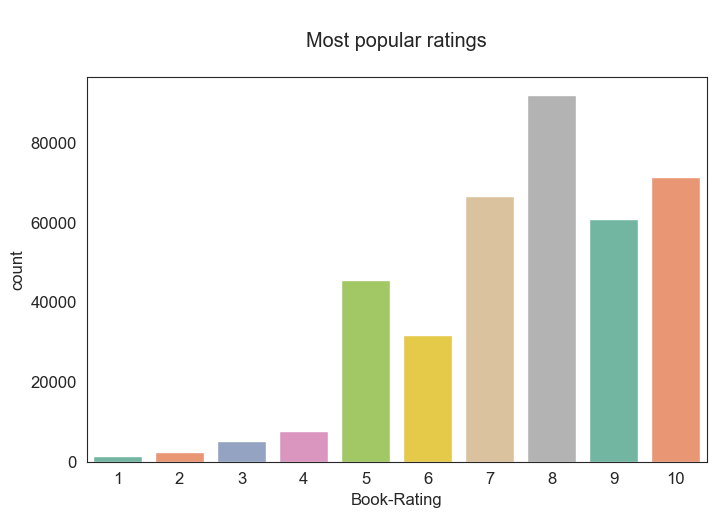

In [200]:
# most popular rating
plt.figure(figsize=[8,5])
plt.rc('font', size=12)
plt.title('\nMost popular ratings\n')
sns.countplot(data=df, x='Book-Rating',palette='Set2')

* Most of users have given above 4 ratings to books
* 8 is the most common rating given by users


<Axes: title={'center': '\nMost popular books\n'}, xlabel='Count', ylabel='Book-Title'>

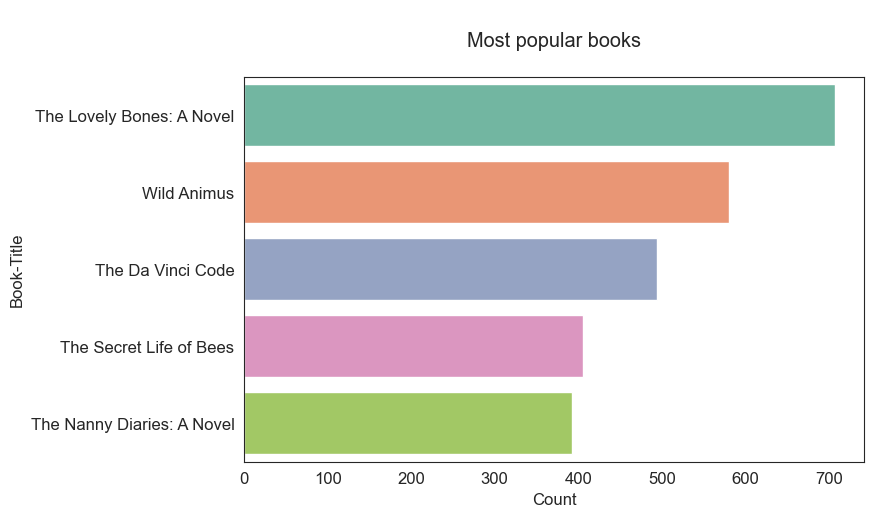

In [201]:
# top 5 most popular books

popular = df.groupby('Book-Title')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:5]
popular.columns = ['Book-Title', 'Count']

plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular books\n')
sns.barplot(data=popular, y='Book-Title', x='Count',palette='Set2')

* The book which has been rated by most number of users is  'The Lovely Bones'

<Axes: title={'center': '\nMost popular Authors\n'}, xlabel='Book-Rating', ylabel='Book-Author'>

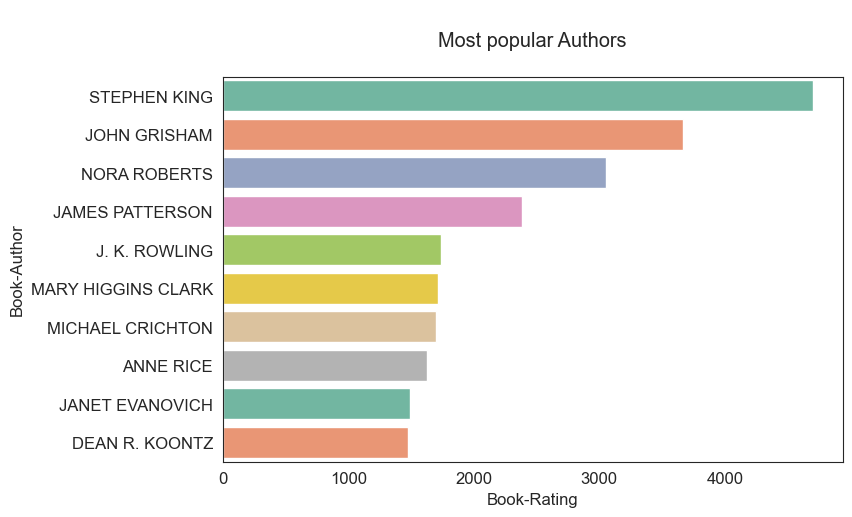

In [202]:
# most popular book authors
author = df.groupby('Book-Author')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False)[:10]
plt.figure(figsize=[8, 5])
plt.rc('font', size=12)
plt.title('\nMost popular Authors\n')
sns.barplot(data=author, y='Book-Author', x='Book-Rating',palette='Set2')

* Top book author with respect to the number of ratings is Stephen King

<Axes: xlabel='Age', ylabel='Density'>

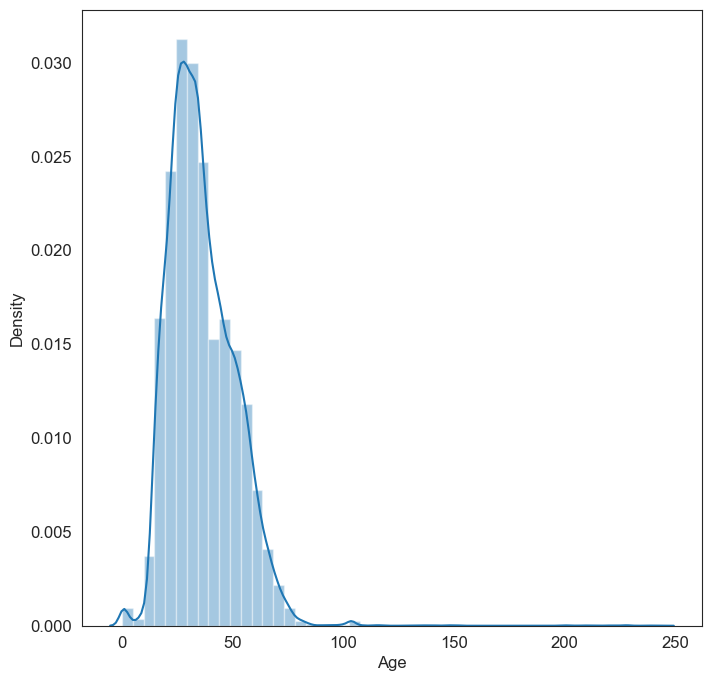

In [203]:
#Age distribution of users
age_df=users_df[users_df['User-ID'].isin(list(df['User-ID'].unique()))]
sns.distplot(age_df.Age)

* The majority of readers are between the ages of 25 and 40.
* Readers who are 80 to 100 years old make up a tiny minority.

Text(0.5, 0, 'No of users')

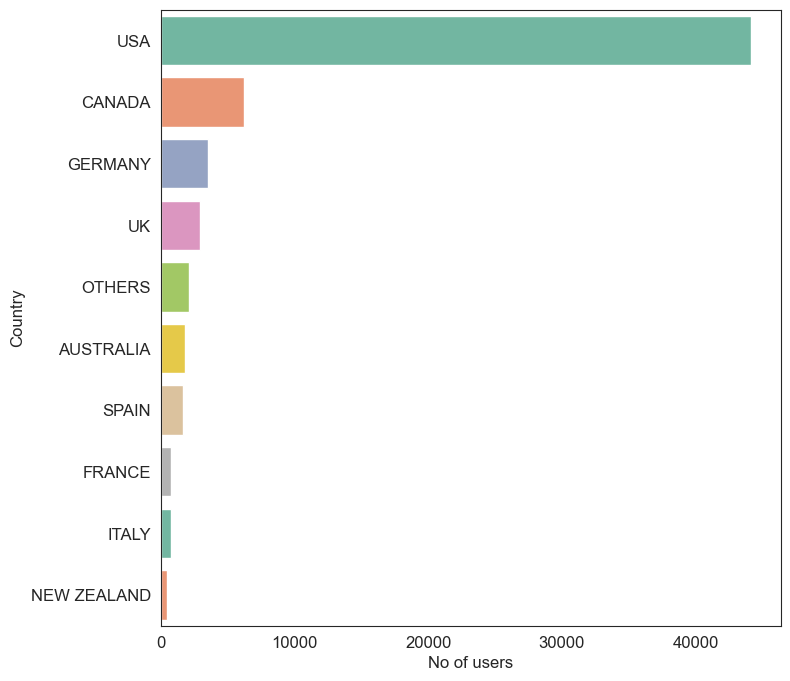

In [204]:
# countries with most readers
countries = df.groupby('Country')['User-ID'].nunique().reset_index().sort_values(by='User-ID', ascending=False)[:10]
sns.barplot(data=countries, y='Country', x='User-ID',palette='Set2')
plt.xlabel('No of users')

* Most of the readers  are from the United States

In [205]:
#How many users have rated atleast 1 book?
df['User-ID'].value_counts()

User-ID
11676     6940
98391     5692
189835    1899
153662    1846
23902     1180
          ... 
37259        1
53095        1
51124        1
235548       1
259679       1
Name: count, Length: 68080, dtype: int64

There are 68080 users who have rated atleast one book

In [206]:
df.groupby('User-ID')['Book-Rating'].count().describe()

count    68080.000000
mean         5.635914
std         41.736965
min          1.000000
25%          1.000000
50%          1.000000
75%          3.000000
max       6940.000000
Name: Book-Rating, dtype: float64

<Axes: xlabel='Book-Title', ylabel='Publisher'>

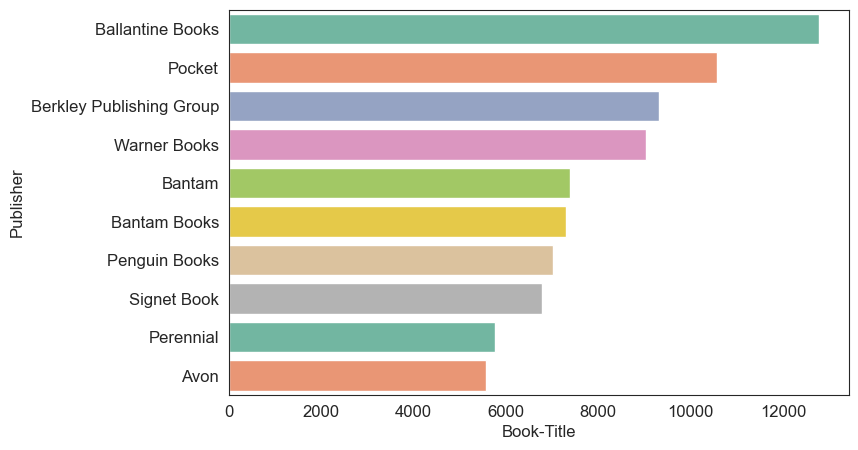

In [207]:
# Publisher with most books

publishers = df.groupby('Publisher')['Book-Title'].count().reset_index().sort_values(by='Book-Title', ascending=False)[:10]
plt.figure(figsize=[8, 5])
sns.barplot(data=publishers, x='Book-Title', y='Publisher',palette='Set2')

*  Ballantine Books is most popular publisher based on the number of users who have rated their books

In [208]:
df.head(2)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated,Age,Country
0,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,8,5,7.666667,9,NaN,CANADA
1,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg,11676,8,7.666667,9,NaN,OTHERS




---


**EDA CONCLUSIONS**
* The Lovely Bones: A Novel and Wild Animus are the two most read books.
* Most popular book author based on the number of ratings is Stephan King .
* Ballantine Books and Pocket are the top publishers based on the number of ratings that their books have received.
* The majority of readers are between the ages of 20 and 40.
* The majority of readers who have given the books ratings are from the United States and Canada.



# ***4. ML Model Implementation***

## Popularity Based Filtering

Popularity based recommendation system works with the trend. It basically uses the items which are in trend right now. For example, if any book which is usually bought by every new user then there are chances that it may suggest that book to the user who just signed up.

Book weighted avg formula:<br>
Weighted Rating(WR)=[vR/(v+m)]+[mC/(v+m)]<br>
where,<br>
v is the number of votes for the books;<br>
m is the minimum votes required to be listed in the chart;<br>
R is the average rating of the book; and<br>
C is the mean vote across the whole report.<br>
Now we find the values of v,m,R,C.

In [209]:
# getting C and m
C= df['Avg_Rating'].mean()
m= df['Total_No_Of_Users_Rated'].quantile(0.90)

# getting a books who had ratings more than 90 percentile
Top_Books = df.loc[df['Total_No_Of_Users_Rated'] >= m]
print(f'C={C} , m={m}')
Top_Books.shape

C=7.626719799422976 , m=65.0


(38378, 14)

In [210]:
# function for weighted average
def weighted_rating(x,C=C,m=m):
  v=x['Total_No_Of_Users_Rated']
  R=x['Avg_Rating']
  return (v/(v+m) * R) + (m/(m+v) * C)

In [211]:
# Apply function of Top_Books dataset
Top_Books["Score"]=Top_Books.apply(weighted_rating,axis=1)

In [212]:
# Sorting Dataset on the basis of Score
Top_Books.sort_values("Score",ascending=False,inplace=True)

In [213]:
# Dropping duplicates from data
Top_Books.drop_duplicates('ISBN',inplace=True)

In [214]:
# Getting DataFrame of Top 20 Books to recommend every new user.
Top_Books[['Book-Title', 'Total_No_Of_Users_Rated', 'Avg_Rating', 'Score']].reset_index(drop=True).head(20)

,Book-Title,Total_No_Of_Users_Rated,Avg_Rating,Score
0,Harry Potter and the Goblet of Fire (Book 4),137,9.262774,8.736321
1,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),313,8.939297,8.713589
2,Harry Potter and the Order of the Phoenix (Book 5),206,9.033981,8.696446
3,To Kill a Mockingbird,214,8.943925,8.637049
4,Harry Potter and the Prisoner of Azkaban (Book 3),133,9.082707,8.604731
5,Harry Potter and the Prisoner of Azkaban (Book 3),141,9.035461,8.590955
6,"The Return of the King (The Lord of the Rings, Part 3)",77,9.402597,8.589696
7,Harry Potter and the Sorcerer's Stone (Book 1),119,8.983193,8.504004
8,Harry Potter and the Chamber of Secrets (Book 2),189,8.783069,8.487153
9,Harry Potter and the Chamber of Secrets (Book 2),126,8.920635,8.480297


In [215]:
# function for getting most popular recommendations

def most_popular(df, n):
  if n >= 1 and n <= len(df):
    popular = df.groupby('ISBN')['Book-Rating'].count().reset_index().sort_values(by='Book-Rating', ascending=False).head(n)
    return pd.merge(popular, books_df, on='ISBN')
  return 'Please enter a valid value of n!'

In [216]:
most_popular(df, 3)

,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0316666343,707,The Lovely Bones: A Novel,ALICE SEBOLD,2002.0,"Little, Brown",http://images.amazon.com/images/P/0316666343.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0316666343.01.LZZZZZZZ.jpg
1,0971880107,581,Wild Animus,RICH SHAPERO,2004.0,Too Far,http://images.amazon.com/images/P/0971880107.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0971880107.01.LZZZZZZZ.jpg
2,0385504209,487,The Da Vinci Code,DAN BROWN,2003.0,Doubleday,http://images.amazon.com/images/P/0385504209.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0385504209.01.LZZZZZZZ.jpg


## Collaborative Filtering Memory based Recommendation System--(User-User based) 

In [217]:
explicit_rating.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
1,276726,0155061224,5,5.000000,1
3,276729,052165615X,3,3.000000,1
4,276729,0521795028,6,6.000000,1
8,276744,038550120X,7,7.580247,81
16,276747,0060517794,9,8.000000,30


 we are keeping in the dataset only users with at least 100 interactions.

In [218]:
users_interactions_count_df = explicit_rating.groupby(['ISBN', 'User-ID']).size().groupby('User-ID').size()
print('# of users: %d' % len(users_interactions_count_df))

users_with_enough_interactions_df = users_interactions_count_df[users_interactions_count_df >= 100].reset_index()[['User-ID']]
print('# of users with at least 100 interactions: %d' % len(users_with_enough_interactions_df))

# of users: 68080
# of users with at least 100 interactions: 449


In [219]:
print('# of interactions: %d' % len(explicit_rating))
interactions_from_selected_users_df = explicit_rating.merge(users_with_enough_interactions_df,
               how = 'right',
               left_on = 'User-ID',
               right_on = 'User-ID')
print('# of interactions from users with at least 5 interactions: %d' % len(interactions_from_selected_users_df))

# of interactions: 383643
# of interactions from users with at least 5 interactions: 103218


In [220]:
interactions_from_selected_users_df.head(10)

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
0,2033,0030020786,7,7.000000,1
1,2033,0060248025,10,8.766667,30
2,2033,0060256664,10,8.333333,6
3,2033,0060256737,10,9.045455,22
4,2033,0060950536,10,9.400000,5
5,2033,0061020419,7,7.000000,1
6,2033,0061020427,6,6.000000,1
7,2033,0061056278,10,9.000000,2
8,2033,0061056286,8,7.666667,3
9,2033,0061056294,9,7.000000,2


In [221]:
import math
from sklearn.model_selection import train_test_split

In [222]:
def smooth_user_preference(x):
    return math.log(1+x, 2)

ratings_full_df = interactions_from_selected_users_df.groupby(['User-ID','ISBN'])['Book-Rating'].sum().apply(smooth_user_preference).reset_index()
print('# of unique user/book ratings: %d' % len(ratings_full_df))
ratings_full_df.head()

# of unique user/book ratings: 103218


,User-ID,ISBN,Book-Rating
0,2033,0030020786,3.000000
1,2033,0060248025,3.459432
2,2033,0060256664,3.459432
3,2033,0060256737,3.459432
4,2033,0060950536,3.459432


In [223]:
ratings_train_df, ratings_test_df = train_test_split(ratings_full_df,
                                   stratify=ratings_full_df['User-ID'],
                                   test_size=0.20,
                                   random_state=42)

print('# interactions on Train set: %d' % len(ratings_train_df))
print('# interactions on Test set: %d' % len(ratings_test_df))

# interactions on Train set: 82574
# interactions on Test set: 20644


In [224]:
#Creating a sparse pivot table with users in rows and items in columns
users_items_pivot_matrix_df = ratings_train_df.pivot(index='User-ID',
                                                          columns='ISBN',
                                                          values='Book-Rating').fillna(0)

users_items_pivot_matrix_df.head()

ISBN,0000913154,000104687X,0001047973,000104799X,0001048082,0001053736,0001053744,0001056107,0001845039,0001935968,...,B00006CRTE,B00007FYKW,B00008RWPV,B000092Q0A,B00009EF82,B00009NDAN,B0000DYXID,B0000X8HIE,B0001I1KOG,B000234N3A
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [225]:
users_items_pivot_matrix = users_items_pivot_matrix_df.values
users_items_pivot_matrix[:10]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [226]:
users_ids = list(users_items_pivot_matrix_df.index)
users_ids[:10]

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575]

In [227]:
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse.linalg import svds

In [228]:
# The number of factors to factor the user-item matrix.
NUMBER_OF_FACTORS_MF = 15

#Performs matrix factorization of the original user item matrix
U, sigma, Vt = svds(users_items_pivot_matrix, k = NUMBER_OF_FACTORS_MF)

In [229]:
users_items_pivot_matrix.shape

(449, 55883)

In [230]:
U.shape

(449, 15)

In [231]:
sigma = np.diag(sigma)
sigma.shape

(15, 15)

In [232]:
Vt.shape

(15, 55883)

After the factorization, we try to to reconstruct the original matrix by multiplying its factors. The resulting matrix is not sparse any more. It was generated predictions for items the user have not yet interaction, which we will exploit for recommendations.

In [233]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt)
all_user_predicted_ratings

array([[ 0.01733077,  0.0027921 ,  0.00330388, ...,  0.0012938 ,
         0.00039019,  0.0087447 ],
       [ 0.00032903, -0.0006894 , -0.00081576, ...,  0.00041622,
         0.00015883,  0.00282784],
       [ 0.00459014, -0.00171395, -0.0020281 , ...,  0.00113719,
         0.00035406,  0.00714377],
       ...,
       [ 0.0047435 ,  0.00214978,  0.00254382, ...,  0.00096478,
         0.00049112,  0.00757833],
       [ 0.02816612, -0.00227859, -0.00269624, ...,  0.00128147,
         0.00072672,  0.01072866],
       [-0.00076533,  0.00225201,  0.00266479, ...,  0.00031609,
         0.00017691,  0.00269938]])

In [234]:
all_user_predicted_ratings.shape

(449, 55883)

In [235]:
cf_preds_df = pd.DataFrame(all_user_predicted_ratings, columns = users_items_pivot_matrix_df.columns, index=users_ids).transpose()
cf_preds_df.head()

,2033,2110,2276,4017,4385,5582,6242,6251,6543,6575,...,269566,270713,271448,271705,273113,274061,274301,275970,277427,278418
ISBN,,,,,,,,,,,,,,,,,,,,,
0000913154,0.017331,0.000329,0.004590,0.001000,-0.001696,-0.003680,-0.003304,0.001354,0.011427,0.012453,...,-0.004465,-0.002720,-0.002441,0.001582,-0.009039,0.003749,0.014731,0.004744,0.028166,-0.000765
000104687X,0.002792,-0.000689,-0.001714,0.017308,-0.000550,0.008092,0.016928,0.006323,-0.002778,0.011584,...,-0.002434,0.013200,-0.001499,0.019831,-0.004529,-0.006056,0.016189,0.002150,-0.002279,0.002252
0001047973,0.003304,-0.000816,-0.002028,0.020481,-0.000651,0.009576,0.020031,0.007482,-0.003287,0.013707,...,-0.002880,0.015620,-0.001774,0.023465,-0.005359,-0.007166,0.019156,0.002544,-0.002696,0.002665
000104799X,0.000641,0.000243,0.000681,0.001612,0.000176,0.001203,0.001292,0.002642,0.001651,0.004085,...,0.001218,0.002340,0.002373,0.001287,0.001363,0.002147,0.001654,0.000799,0.001294,0.000267
0001048082,0.004278,-0.000256,-0.000606,0.021918,-0.000316,0.010934,0.020981,0.011628,-0.000686,0.019336,...,-0.000876,0.019079,0.002148,0.024733,-0.003194,-0.003077,0.021482,0.003627,-0.000592,0.003032


In [236]:
len(cf_preds_df.columns)

449

In [237]:
global books_df
books_df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,MARK P. O. MORFORD,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0195153448.01.LZZZZZZZ.jpg
1,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
2,0060973129,Decision in Normandy,CARLO D'ESTE,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0060973129.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,GINA BARI KOLATA,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
4,0393045218,The Mummies of Urumchi,E. J. W. BARBER,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0393045218.01.LZZZZZZZ.jpg


In [238]:
class CFRecommender:

    MODEL_NAME = 'Collaborative Filtering'

    def __init__(self, cf_predictions_df):
        self.cf_predictions_df = cf_predictions_df

    def get_model_name(self):
        return self.MODEL_NAME

    def recommend_items(self, user_id, items_to_ignore=[], topn=10):
        # Get and sort the user's predictions
        sorted_user_predictions = self.cf_predictions_df[user_id].sort_values(ascending=False).reset_index().rename(columns={user_id: 'recStrength'})

        # Recommend the highest predicted rating content that the user hasn't seen yet.
        recommendations_df = sorted_user_predictions[~sorted_user_predictions['ISBN'].isin(items_to_ignore)].sort_values('recStrength', ascending = False).head(topn)
        recommendations_df=recommendations_df.merge(books_df,on='ISBN',how='inner')
        recommendations_df=recommendations_df[['ISBN','Book-Title','','recStrength']]

        return recommendations_df



cf_recommender_model = CFRecommender(cf_preds_df)

In [239]:
#Indexing by personId to speed up the searches during evaluation
ratings_full_indexed_df = ratings_full_df.set_index('User-ID')
ratings_train_indexed_df = ratings_train_df.set_index('User-ID')
ratings_test_indexed_df = ratings_test_df.set_index('User-ID')

In [240]:
def get_items_interacted(UserID, interactions_df):
    interacted_items = interactions_df.loc[UserID]['ISBN']
    return set(interacted_items if type(interacted_items) == pd.Series else [interacted_items])

In [241]:
# 1
class ModelRecommender:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, ratings_full_indexed_df)
        all_items = set(explicit_rating['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(list(non_interacted_items), sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, person_id):

        # Getting the items in test set
        interacted_values_testset = ratings_test_indexed_df.loc[person_id]

        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])

        interacted_items_count_testset = len(person_interacted_items_testset)

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(person_id, items_to_ignore=get_items_interacted(person_id, ratings_train_indexed_df),topn=10000000000)
        print('Recommendation for User-ID = ',person_id)
        print(person_recs_df.head(10))

        # Function to evaluate the performance of model at overall level
    def recommend_book(self, model ,userid):

        person_metrics = self.evaluate_model_for_user(model, userid)
        return

model_recommender = ModelRecommender()

In [242]:
# 2
print(list(ratings_full_indexed_df.index.values))

[2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2033, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 2110, 211

In [243]:
# 3
user=int(input("Enter User ID from above list for book recommendation  "))
model_recommender.recommend_book(cf_recommender_model,user)

Enter User ID from above list for book recommendation  2033
Recommendation for User-ID =  2033
         ISBN  \
0  043935806X   
1  059035342X   
2  0439064864   
3  0316666343   
4  0312924585   
5  0439136350   
6  0590353403   
7  0399501487   
8  0804106304   
9  0345370775   

                                                         Book-Title  \
0                Harry Potter and the Order of the Phoenix (Book 5)   
1  Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))   
2                  Harry Potter and the Chamber of Secrets (Book 2)   
3                                         The Lovely Bones: A Novel   
4                                              Silence of the Lambs   
5                 Harry Potter and the Prisoner of Azkaban (Book 3)   
6                    Harry Potter and the Sorcerer's Stone (Book 1)   
7                                                 Lord of the Flies   
8                                                 The Joy Luck Club   
9      

### Model Evaluation

In [117]:
#Top-N accuracy metrics consts
EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS = 100

class ModelEvaluator:

    # Function for getting the set of items which a user has not interacted with
    def get_not_interacted_items_sample(self, UserID, sample_size, seed=42):
        interacted_items = get_items_interacted(UserID, ratings_full_indexed_df)
        all_items = set(explicit_rating['ISBN'])
        non_interacted_items = all_items - interacted_items

        random.seed(seed)
        non_interacted_items_sample = random.sample(list(non_interacted_items), sample_size)
        return set(non_interacted_items_sample)

    # Function to verify whether a particular item_id was present in the set of top N recommended items
    def _verify_hit_top_n(self, item_id, recommended_items, topn):
            try:
                index = next(i for i, c in enumerate(recommended_items) if c == item_id)
            except:
                index = -1
            hit = int(index in range(0, topn))
            return hit, index

    # Function to evaluate the performance of model for each user
    def evaluate_model_for_user(self, model, UserID):

        # Getting the items in test set
        interacted_values_testset = ratings_test_indexed_df.loc[UserID]

        if type(interacted_values_testset['ISBN']) == pd.Series:
            person_interacted_items_testset = set(interacted_values_testset['ISBN'])
        else:
            person_interacted_items_testset = set([int(interacted_values_testset['ISBN'])])

        interacted_items_count_testset = len(person_interacted_items_testset)

        # Getting a ranked recommendation list from the model for a given user
        person_recs_df = model.recommend_items(UserID, items_to_ignore=get_items_interacted(UserID, ratings_train_indexed_df),topn=10000000000)

        hits_at_5_count = 0
        hits_at_10_count = 0

        # For each item the user has interacted in test set
        for item_id in person_interacted_items_testset:

            # Getting a random sample of 100 items the user has not interacted with
            non_interacted_items_sample = self.get_not_interacted_items_sample(UserID, sample_size=EVAL_RANDOM_SAMPLE_NON_INTERACTED_ITEMS, seed=item_id)

            # Combining the current interacted item with the 100 random items
            items_to_filter_recs = non_interacted_items_sample.union(set([item_id]))

            # Filtering only recommendations that are either the interacted item or from a random sample of 100 non-interacted items
            valid_recs_df = person_recs_df[person_recs_df['ISBN'].isin(items_to_filter_recs)]
            valid_recs = valid_recs_df['ISBN'].values

            # Verifying if the current interacted item is among the Top-N recommended items
            hit_at_5, index_at_5 = self._verify_hit_top_n(item_id, valid_recs, 5)
            hits_at_5_count += hit_at_5
            hit_at_10, index_at_10 = self._verify_hit_top_n(item_id, valid_recs, 10)
            hits_at_10_count += hit_at_10

        # Recall is the rate of the interacted items that are ranked among the Top-N recommended items
        recall_at_5 = hits_at_5_count / float(interacted_items_count_testset)
        recall_at_10 = hits_at_10_count / float(interacted_items_count_testset)

        person_metrics = {'hits@5_count':hits_at_5_count,
                          'hits@10_count':hits_at_10_count,
                          'interacted_count': interacted_items_count_testset,
                          'recall@5': recall_at_5,
                          'recall@10': recall_at_10}
        return person_metrics


    # Function to evaluate the performance of model at overall level
    def evaluate_model(self, model):

        people_metrics = []

        for idx, person_id in enumerate(list(ratings_test_indexed_df.index.unique().values)):
            person_metrics = self.evaluate_model_for_user(model, person_id)
            person_metrics['User-ID'] = person_id
            people_metrics.append(person_metrics)

        print('%d users processed' % idx)

        detailed_results_df = pd.DataFrame(people_metrics).sort_values('interacted_count', ascending=False)

        global_recall_at_5 = detailed_results_df['hits@5_count'].sum() / float(detailed_results_df['interacted_count'].sum())
        global_recall_at_10 = detailed_results_df['hits@10_count'].sum() / float(detailed_results_df['interacted_count'].sum())

        global_metrics = {'modelName': model.get_model_name(),
                          'recall@5': global_recall_at_5,
                          'recall@10': global_recall_at_10}
        return global_metrics, detailed_results_df

model_evaluator = ModelEvaluator()

In [118]:
print('Evaluating Collaborative Filtering (SVD Matrix Factorization) model...')
cf_global_metrics, cf_detailed_results_df = model_evaluator.evaluate_model(cf_recommender_model)

print('\nGlobal metrics:\n%s' % cf_global_metrics)
cf_detailed_results_df.head(10) 

Evaluating Collaborative Filtering (SVD Matrix Factorization) model...
448 users processed

Global metrics:
{'modelName': 'Collaborative Filtering', 'recall@5': 0.2375993024607634, 'recall@10': 0.3067235031970548}


,hits@5_count,hits@10_count,interacted_count,recall@5,recall@10,User-ID
6,258,335,1388,0.185879,0.241354,11676
13,177,235,1138,0.155536,0.206503,98391
130,17,23,380,0.044737,0.060526,189835
32,95,113,369,0.257453,0.306233,153662
49,28,33,236,0.118644,0.139831,23902
154,31,45,204,0.151961,0.220588,235105
15,17,22,202,0.084158,0.108911,76499
1,58,71,192,0.302083,0.369792,16795
182,32,42,192,0.166667,0.218750,171118
129,24,32,188,0.127660,0.170213,248718


### Collaborative filtering -KNN Model Based- User Based

In [118]:
ratings_full_df.shape

(103218, 3)

In [119]:
ratings_full_df_final= ratings_full_df.merge(books_df, left_on ='ISBN', right_on= 'ISBN', how='left')

In [120]:
user_pt_knn = ratings_full_df_final.pivot_table(index='User-ID',columns='Book-Title',values='Book-Rating')

In [121]:
# filling null values
user_pt_knn.fillna(0, inplace=True)
user_pt_knn

Book-Title,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Dark Justice,"Earth Prayers From around the World: 365 Prayers, Poems, and Invocations for Honoring the Earth",Final Fantasy Anthology: Official Strategy Guide (Brady Games),"Good Wives: Image and Reality in the Lives of Women in Northern New England, 1650-1750",Highland Desire (Zebra Splendor Historical Romances),"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),Nonbook Materials: The Organization of Integrated Collections,"Q-Space (Star Trek The Next Generation, Book 47)",...,the Dark Light Years,them (Modern Library),together by christmas,"wet sand, raven tracks",whataboutrick.com: a poetic tribute to Richard A. Ricci,why I'm like this : True Stories,"Â¡Corre, perro, corre!",Â¿Eres tu mi mamÃ¡?/Are You My Mother?,Ã?ngeles fugaces (Falling Angels),Ã?Â?ber das Fernsehen.
User-ID,,,,,,,,,,,,,,,,,,,,,
2033,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
274301,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
275970,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
# converting to sparse matrix
from scipy.sparse import csr_matrix

sparse_user_item_knn = csr_matrix(user_pt_knn)
sparse_user_item_knn

<449x61620 sparse matrix of type '<class 'numpy.float64'>'
	with 102460 stored elements in Compressed Sparse Row format>

In [123]:
from sklearn.neighbors import NearestNeighbors
#Creating an instance of KNN with cosine metric

model_cosine = NearestNeighbors(metric='cosine', algorithm='brute')
model_cosine.fit(sparse_user_item_knn)

NearestNeighbors(algorithm='brute', metric='cosine')

In [130]:
def get_userbased_book_recommendations(user_id, n_recommendations=5):
    user_index = user_pt_knn.index.get_loc(user_id)
    distances, indices = model_cosine.kneighbors(sparse_user_item_knn[user_index], n_neighbors=n_recommendations+1)
    neighbors_ratings = user_pt_knn.iloc[indices.flatten()[1:]]
    recommendations = neighbors_ratings.mean(axis=0).sort_values(ascending=False)
    recommended_books = books_df[books_df['Book-Title'].isin(recommendations.index)]
    return recommended_books.iloc[0:10,:]

In [131]:
get_userbased_book_recommendations(2033,5)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,GINA BARI KOLATA,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
5,0399135782,The Kitchen God's Wife,AMY TAN,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0399135782.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0399135782.01.LZZZZZZZ.jpg
6,0425176428,What If?: The World's Foremost Military Historians Imagine What Might Have Been,ROBERT COWLEY,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0425176428.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0425176428.01.LZZZZZZZ.jpg
7,0671870432,PLEADING GUILTY,SCOTT TUROW,1993.0,Audioworks,http://images.amazon.com/images/P/0671870432.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671870432.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671870432.01.LZZZZZZZ.jpg
14,1558746218,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),JACK CANFIELD,1998.0,Health Communications,http://images.amazon.com/images/P/1558746218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1558746218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1558746218.01.LZZZZZZZ.jpg
18,0440234743,The Testament,JOHN GRISHAM,1999.0,Dell,http://images.amazon.com/images/P/0440234743.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0440234743.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0440234743.01.LZZZZZZZ.jpg
19,0452264464,Beloved (Plume Contemporary Fiction),TONI MORRISON,1994.0,Plume,http://images.amazon.com/images/P/0452264464.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0452264464.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0452264464.01.LZZZZZZZ.jpg
20,0609804618,Our Dumb Century: The Onion Presents 100 Years of Headlines from America's Finest News Source,THE ONION,1999.0,Three Rivers Press,http://images.amazon.com/images/P/0609804618.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0609804618.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0609804618.01.LZZZZZZZ.jpg
21,1841721522,New Vegetarian: Bold and Beautiful Recipes for Every Occasion,CELIA BROOKS BROWN,2001.0,Ryland Peters &amp; Small Ltd,http://images.amazon.com/images/P/1841721522.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1841721522.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1841721522.01.LZZZZZZZ.jpg


In [132]:
user_ids_list=list(ratings_full_df_final['User-ID'].unique())
print(user_ids_list)

[2033, 2110, 2276, 4017, 4385, 5582, 6242, 6251, 6543, 6575, 7286, 7346, 8067, 8245, 8681, 8890, 10560, 11676, 11993, 12538, 12824, 12982, 13552, 13850, 14422, 15408, 15418, 16634, 16795, 16966, 17950, 19085, 21014, 23768, 23872, 23902, 25409, 25601, 25981, 26535, 26544, 26583, 28591, 28634, 29259, 30276, 30511, 30711, 30735, 30810, 31315, 31556, 31826, 32773, 33145, 35433, 35836, 35857, 35859, 36299, 36554, 36606, 36609, 36836, 36907, 37644, 37712, 37950, 38023, 38273, 38281, 39281, 39467, 40889, 40943, 43246, 43910, 46398, 47316, 48025, 48494, 49144, 49889, 51883, 52199, 52350, 52584, 52614, 52917, 53220, 55187, 55490, 55492, 56271, 56399, 56447, 56554, 56959, 59172, 60244, 60337, 60707, 63714, 63956, 65258, 66942, 67840, 68555, 69078, 69389, 69697, 70415, 70594, 70666, 72352, 73681, 75591, 75819, 76151, 76223, 76499, 76626, 78553, 78783, 78834, 78973, 79441, 81492, 81560, 83287, 83637, 83671, 85526, 85656, 86189, 86947, 87141, 87555, 88283, 88677, 88693, 88733, 89602, 91113, 92652, 

In [134]:
userid_ip=int(input("Enter User ID from above list for book recommendation  "))
get_userbased_book_recommendations(userid_ip,5)

Enter User ID from above list for book recommendation  2033


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1,0002005018,Clara Callan,RICHARD BRUCE WRIGHT,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0002005018.01.LZZZZZZZ.jpg
3,0374157065,Flu: The Story of the Great Influenza Pandemic of 1918 and the Search for the Virus That Caused It,GINA BARI KOLATA,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0374157065.01.LZZZZZZZ.jpg
5,0399135782,The Kitchen God's Wife,AMY TAN,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0399135782.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0399135782.01.LZZZZZZZ.jpg
6,0425176428,What If?: The World's Foremost Military Historians Imagine What Might Have Been,ROBERT COWLEY,2000.0,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0425176428.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0425176428.01.LZZZZZZZ.jpg
7,0671870432,PLEADING GUILTY,SCOTT TUROW,1993.0,Audioworks,http://images.amazon.com/images/P/0671870432.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0671870432.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0671870432.01.LZZZZZZZ.jpg
14,1558746218,A Second Chicken Soup for the Woman's Soul (Chicken Soup for the Soul Series),JACK CANFIELD,1998.0,Health Communications,http://images.amazon.com/images/P/1558746218.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1558746218.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1558746218.01.LZZZZZZZ.jpg
18,0440234743,The Testament,JOHN GRISHAM,1999.0,Dell,http://images.amazon.com/images/P/0440234743.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0440234743.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0440234743.01.LZZZZZZZ.jpg
19,0452264464,Beloved (Plume Contemporary Fiction),TONI MORRISON,1994.0,Plume,http://images.amazon.com/images/P/0452264464.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0452264464.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0452264464.01.LZZZZZZZ.jpg
20,0609804618,Our Dumb Century: The Onion Presents 100 Years of Headlines from America's Finest News Source,THE ONION,1999.0,Three Rivers Press,http://images.amazon.com/images/P/0609804618.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/0609804618.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/0609804618.01.LZZZZZZZ.jpg
21,1841721522,New Vegetarian: Bold and Beautiful Recipes for Every Occasion,CELIA BROOKS BROWN,2001.0,Ryland Peters &amp; Small Ltd,http://images.amazon.com/images/P/1841721522.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/1841721522.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/1841721522.01.LZZZZZZZ.jpg


## Collaborative Filtering based Recommendation System--(Item-Item Based)

### Cosine similarity

In [119]:
from sklearn.metrics.pairwise import cosine_similarity

In [120]:
b = df.groupby('User-ID').count()['Book-Rating']>50
users_with_ratings = b[b].index

In [121]:
filtered_rating = df[df['User-ID'].isin(users_with_ratings)]

In [122]:
c = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 20
famous_books = c[c].index

In [123]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [124]:
pt = final_ratings.pivot_table(index='Book-Title',columns='User-ID',values='Book-Rating')

In [125]:
pt.fillna(0,inplace=True)
pt

User-ID,254,638,1424,1733,1903,2033,2110,2276,2766,2891,...,274004,274061,274111,274301,275970,276680,277427,278137,278188,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,9.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0
A Bend in the Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Word Freak: Heartbreak, Triumph, Genius, and Obsession in the World of Competitive Scrabble Players",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Wuthering Heights,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Year of Wonders,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [126]:
similarity_scores = cosine_similarity(pt)

In [127]:
df.columns

Index(['ISBN', 'Book-Title', 'Book-Author', 'Year-Of-Publication', 'Publisher',
       'Image-URL-S', 'Image-URL-M', 'Image-URL-L', 'User-ID', 'Book-Rating',
       'Avg_Rating', 'Total_No_Of_Users_Rated', 'Age', 'Country'],
      dtype='object')

In [128]:
def recommendation(book_name):
    # fetching Index
    index = np.where(np.array(list(pt.index))==book_name)[0][0]
    similar_items = sorted(list(enumerate(similarity_scores[0])),reverse=True,key=lambda x:x[1])[1:9]
    
    data =[]
    for i in similar_items:
        item = []
        temp_df = df[df['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
    return data

In [129]:
recommendation("1984")

[['Animal Farm',
  'GEORGE ORWELL',
  'http://images.amazon.com/images/P/0451526341.01.MZZZZZZZ.jpg'],
 ['Brave New World',
  'ALDOUS HUXLEY',
  'http://images.amazon.com/images/P/0060809833.01.MZZZZZZZ.jpg'],
 ["The Handmaid's Tale",
  'MARGARET ATWOOD',
  'http://images.amazon.com/images/P/0449212602.01.MZZZZZZZ.jpg'],
 ['The Catcher in the Rye',
  'J.D. SALINGER',
  'http://images.amazon.com/images/P/0316769177.01.MZZZZZZZ.jpg'],
 ['The Alchemist: A Fable About Following Your Dream',
  'PAULO COELHO',
  'http://images.amazon.com/images/P/0062502174.01.MZZZZZZZ.jpg'],
 ['Naked',
  'DAVID SEDARIS',
  'http://images.amazon.com/images/P/0316779490.01.MZZZZZZZ.jpg'],
 ['The Vampire Lestat (Vampire Chronicles, Book II)',
  'ANNE RICE',
  'http://images.amazon.com/images/P/0345313860.01.MZZZZZZZ.jpg'],
 ['Timeline',
  'MICHAEL CRICHTON',
  'http://images.amazon.com/images/P/0345417623.01.MZZZZZZZ.jpg']]

### KNN based

In [130]:
from sklearn.neighbors import NearestNeighbors
from scipy.spatial.distance import correlation
from sklearn.metrics.pairwise import pairwise_distances
import ipywidgets as widgets
from IPython.display import display, clear_output
from contextlib import contextmanager
import numpy as np
import os, sys
import re
from scipy.sparse import csr_matrix

In [131]:
# Taking out only users who rated 5 or more than 5 books
user_ratings_threshold = 5

filter_users = explicit_rating['User-ID'].value_counts()
filter_users_list = filter_users[filter_users >= user_ratings_threshold].index.to_list()

df_ratings_top = explicit_rating[explicit_rating['User-ID'].isin(filter_users_list)]

print('Filter: users with at least %d ratings\nNumber of records: %d' % (user_ratings_threshold, len(df_ratings_top)))

Filter: users with at least 5 ratings
Number of records: 302039


In [132]:
# Keeping only top 10 most frequently rated book
book_ratings_threshold_perc = 0.1
book_ratings_threshold = len(df_ratings_top['ISBN'].unique()) * book_ratings_threshold_perc

filter_books_list = df_ratings_top['ISBN'].value_counts().head(int(book_ratings_threshold)).index.to_list()
df_ratings_top = df_ratings_top[df_ratings_top['ISBN'].isin(filter_books_list)]

print('Filter: top %d%% most frequently rated books\nNumber of records: %d' % (book_ratings_threshold_perc*100, len(df_ratings_top)))

Filter: top 10% most frequently rated books
Number of records: 145144


In [133]:
df_ratings_top.head()

,User-ID,ISBN,Book-Rating,Avg_Rating,Total_No_Of_Users_Rated
16,276747,0060517794,9,8.000000,30
19,276747,0671537458,9,7.176471,17
20,276747,0679776818,8,7.476190,21
133,276822,0060096195,10,8.132075,53
137,276822,0375821813,9,8.300000,10


In [134]:
#Generating ratings matrix from explicit ratings table
ratings_matrix = df_ratings_top.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)
userID = ratings_matrix.index
ISBN = ratings_matrix.columns
print(ratings_matrix.shape)
ratings_matrix.head()

(12242, 13121)


ISBN,0002005018,0002251760,0002259834,0002550563,0003300277,0006480764,000648302X,0006485200,000649840X,0006546684,...,8817106100,9129622425,9500723549,950491036X,9505156944,958704049X,9681500555,9681500954,9722016563,9871138148
User-ID,,,,,,,,,,,,,,,,,,,,,
8,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
243,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [135]:
n_users = ratings_matrix.shape[0] #considering only those users who gave explicit ratings
n_books = ratings_matrix.shape[1]
print (n_users, n_books)

12242 13121


In [136]:
# converting type as int from float
ratings_matrix = ratings_matrix.astype(np.int32)

In [137]:
#checking first few rows
ratings_matrix.head(5)

ISBN,0002005018,0002251760,0002259834,0002550563,0003300277,0006480764,000648302X,0006485200,000649840X,0006546684,...,8817106100,9129622425,9500723549,950491036X,9505156944,958704049X,9681500555,9681500954,9722016563,9871138148
User-ID,,,,,,,,,,,,,,,,,,,,,
8,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
242,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
243,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [138]:
# Making New DataFrame from ratings and books
combine_book_rating = pd.merge(rating_df, books_df, on = 'ISBN')

combine_book_rating = combine_book_rating.drop(['Book-Author','Year-Of-Publication', 'Publisher'], axis = 1)
combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
1,2313,034545104X,5,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
2,6543,034545104X,0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
3,8680,034545104X,5,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
4,10314,034545104X,9,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg


In [139]:
# Dropping those rows whose Book-Title is Null
combine_book_rating = combine_book_rating.dropna(axis = 0, subset = ['Book-Title'])
combine_book_rating.head()

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
1,2313,034545104X,5,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
2,6543,034545104X,0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
3,8680,034545104X,5,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg
4,10314,034545104X,9,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg


In [140]:
# Making DataFrame for Book-Title and its total Rating Count
book_ratingcount = (combine_book_rating.
                    groupby(by = ['Book-Title',])['Book-Rating'].
                    count().
                    reset_index().
                    rename(columns = {'Book-Rating':'TotalRatingCount'})
                    [['Book-Title','TotalRatingCount']])

In [141]:
book_ratingcount.head()

,Book-Title,TotalRatingCount
0,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, Book 5)",1
4,Beyond IBM: Leadership Marketing and Finance for the 1990s,1


In [142]:
# Merging Book Rating count Dataframe with combine book and Rating Dataframe
rating_with_totalratingcount = combine_book_rating.merge(book_ratingcount, left_on = 'Book-Title', right_on = 'Book-Title', how = 'inner' )

In [143]:
rating_with_totalratingcount.head()

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S,Image-URL-M,Image-URL-L,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,60
1,2313,034545104X,5,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,60
2,6543,034545104X,0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,60
3,8680,034545104X,5,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,60
4,10314,034545104X,9,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,60


In [144]:
# Try to look into TotalRatingCount with describe function
print(book_ratingcount['TotalRatingCount'].describe())

count    240986.000000
mean          4.277232
std          16.735801
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max        2502.000000
Name: TotalRatingCount, dtype: float64


In [145]:
# Getting percentile for TotalRatingCount
print(book_ratingcount['TotalRatingCount'].quantile(np.arange(.9,1,.01)))

0.90     7.0
0.91     8.0
0.92     9.0
0.93    10.0
0.94    11.0
0.95    13.0
0.96    16.0
0.97    20.0
0.98    29.0
0.99    50.0
Name: TotalRatingCount, dtype: float64


In [146]:
# Keeping ratings only that have 50 or more than 50 RatingCount
popularity_threshold = 50
rating_popular_book = rating_with_totalratingcount.query('TotalRatingCount >= @popularity_threshold')

In [147]:
rating_popular_book.head()

,User-ID,ISBN,Book-Rating,Book-Title,Image-URL-S,Image-URL-M,Image-URL-L,TotalRatingCount
0,276725,034545104X,0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,60
1,2313,034545104X,5,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,60
2,6543,034545104X,0,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,60
3,8680,034545104X,5,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,60
4,10314,034545104X,9,Flesh Tones: A Novel,http://images.amazon.com/images/P/034545104X.01.THUMBZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.MZZZZZZZ.jpg,http://images.amazon.com/images/P/034545104X.01.LZZZZZZZ.jpg,60


In [148]:
# Removing ratings of User rated more than one time for same Book.
print(f' Old DataFrame Shape {rating_popular_book.shape}')
rating_popular_book.drop_duplicates(['User-ID', 'Book-Title'],inplace=True)
print(f' New DataFrame Shape {rating_popular_book.shape}')

 Old DataFrame Shape (288634, 8)
 New DataFrame Shape (285413, 8)


In [149]:
# forming Pivot on Rating Popular Dataframe
us_canada_user_rating_pivot = rating_popular_book.pivot(index = 'Book-Title',columns = 'User-ID', values = 'Book-Rating').fillna(0)
us_canada_user_rating_matrix = csr_matrix(us_canada_user_rating_pivot.values)

In [150]:
# Building NearesrNeighbors model for recommender System
from sklearn.neighbors import NearestNeighbors

model_knn = NearestNeighbors(metric = 'cosine', algorithm = 'brute')
model_knn.fit(us_canada_user_rating_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [151]:
# Try to get Recommendation for random Books
query_index = np.random.choice(us_canada_user_rating_pivot.shape[0])
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for The Things They Carried:

1: On the Road (Penguin 20th Century Classics), with distance of 0.884342680536785:
2: The House on Mango Street (Vintage Contemporaries), with distance of 0.8854836236177569:
3: As Nature Made Him: The Boy Who Was Raised As a Girl, with distance of 0.8859779222567834:
4: In the Lake of the Woods, with distance of 0.8867082496956051:
5: Talking God (Jim Chee Novels), with distance of 0.9012345418572599:


In [152]:
# Getting Index for Harry Potter and the Sorcerer's Stone (Book 1)
us_canada_book_title = us_canada_user_rating_pivot.T.columns
us_canada_book_list = list(us_canada_book_title)
coffey_hands = us_canada_book_list.index("Harry Potter and the Sorcerer's Stone (Book 1)")

In [153]:
# Getting Recommendation for Harry Potter and the Sorcerer's Stone (Book 1)
query_index = coffey_hands
distances, indices = model_knn.kneighbors(us_canada_user_rating_pivot.iloc[query_index, :].values.reshape((1, -1)), n_neighbors = 6)

for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(us_canada_user_rating_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, us_canada_user_rating_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Harry Potter and the Sorcerer's Stone (Book 1):

1: Harry Potter and the Chamber of Secrets (Book 2), with distance of 0.6133704236175678:
2: Harry Potter and the Prisoner of Azkaban (Book 3), with distance of 0.6207682468811146:
3: Harry Potter and the Goblet of Fire (Book 4), with distance of 0.6358214599172334:
4: Harry Potter and the Order of the Phoenix (Book 5), with distance of 0.7423860736112267:
5: The Hobbit: or There and Back Again, with distance of 0.8605803081618257:


In [244]:
import pickle

In [136]:
pickle.dump(model_cosine, open("model.pkl",'wb'))

In [137]:
pickle.dump(user_ids_list, open("user_ids_list.pkl",'wb'))

In [138]:
pickle.dump(books_df, open("books_df.pkl",'wb'))

In [139]:
pickle.dump(user_pt_knn, open("user_pivot.pkl",'wb'))

In [140]:
pickle.dump(sparse_user_item_knn, open("sparse_user_item_knn.pkl",'wb'))

In [ ]:
pickle.dump(cf_preds_df, open("cf_preds_df.pkl",'wb'))

In [246]:
pickle.dump(explicit_rating, open("explicit_rating.pkl",'wb'))

In [247]:
pickle.dump(ratings_full_df, open("ratings_full_df.pkl",'wb'))

In [118]:
pickle.dump(cf_recommender_model, open("cf_recommender_model.pkl",'wb'))

In [119]:
pickle.dump(model_recommender, open("model_recommender.pkl",'wb'))

In [120]:
pickle.dump(model_evaluator, open("model_evaluator.pkl",'wb'))

NameError: name 'model_evaluator' is not defined

In [121]:
loaded_model_recommender = pickle.load(open("model_recommender.pkl",'rb'))

In [122]:
loaded_model_recommender

In [123]:
loaded_cf_recommender_model = pickle.load(open("cf_recommender_model.pkl",'rb'))

In [124]:
loaded_cf_recommender_model

In [125]:
recommended_trial_1 = loaded_model_recommender.recommend_book(loaded_cf_recommender_model, 2276)

Recommendation for User-ID =  2276
         ISBN  \
0  0316666343   
1  059035342X   
2  043935806X   
3  0439064864   
4  0439139597   
5  0312924585   
6  0312195516   
7  0439136350   
8  0345370775   
9  0590353403   

                                                         Book-Title  \
0                                         The Lovely Bones: A Novel   
1  Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))   
2                Harry Potter and the Order of the Phoenix (Book 5)   
3                  Harry Potter and the Chamber of Secrets (Book 2)   
4                      Harry Potter and the Goblet of Fire (Book 4)   
5                                              Silence of the Lambs   
6                               The Red Tent (Bestselling Backlist)   
7                 Harry Potter and the Prisoner of Azkaban (Book 3)   
8                                                     Jurassic Park   
9                    Harry Potter and the Sorcerer's Stone (Book 1)

In [126]:
recommended_trial_1